In [1]:
import time, random
import pandas as pd
from sklearn.linear_model import LinearRegression

times_df = pd.DataFrame({"length": [i * 1000 for i in range(11)], "ms": None}, dtype=float)
times_df

,length,ms
0,0.0,NaN
1,1000.0,NaN
2,2000.0,NaN
3,3000.0,NaN
4,4000.0,NaN
5,5000.0,NaN
6,6000.0,NaN
7,7000.0,NaN
8,8000.0,NaN
9,9000.0,NaN


In [7]:
def measure_shuffle(list_len):
    nums = list(range(list_len))
    t0 = time.time()
    random.shuffle(nums)
    t1 = time.time()
    return (t1-t0)*1000 

<Axes: xlabel='length', ylabel='ms'>

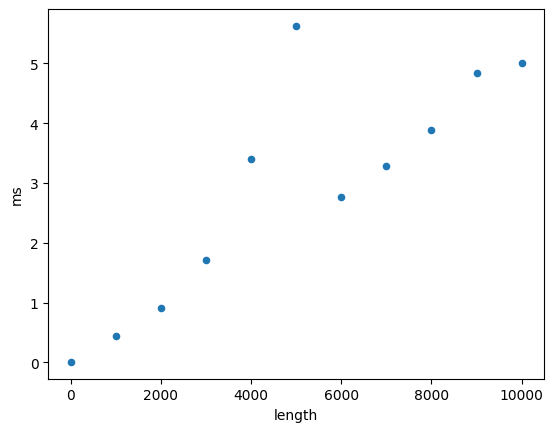

In [8]:
for i in times_df.index:
    length = int(times_df.at[i, "length"])
    times_df.at[i, "ms"] = measure_shuffle(length)

times_df.plot.scatter(x="length", y="ms")
# times_df

In [9]:
lr = LinearRegression()
lr.fit(times_df[["length"]], times_df["ms"])
lr.predict([[1000000]])

/home/riyakore/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([491.8642911])

In [10]:
actual_time = measure_shuffle(1000000)
actual_time

668.1201457977295

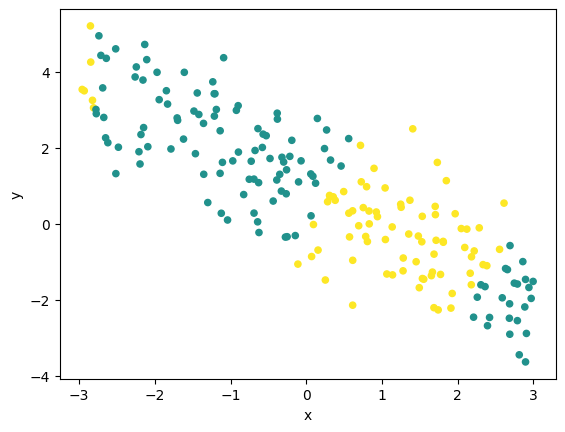

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

x = np.random.uniform(-3, 3, 200)
y = 1 - x + np.random.normal(0, size=x.shape)
z = ((0 < x-y/3) & (x-y/3 < 2.8)) | (x < -2.8)

df = pd.DataFrame({"x":x, "y":y, "z":z})
ax = df.plot.scatter(x="x", y="y", c=df["z"], vmin=-1)

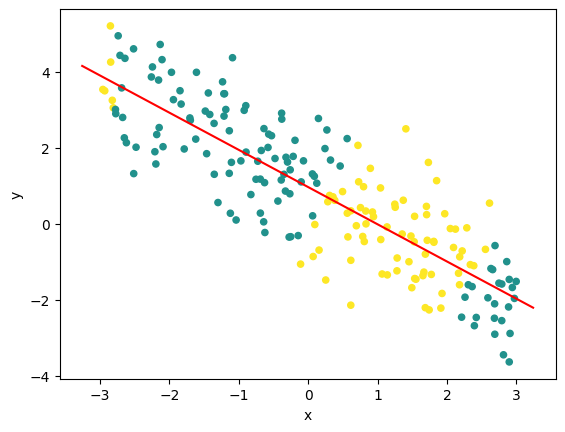

In [12]:
from sklearn.linear_model import LinearRegression
ax = df.plot.scatter(x="x", y="y", c=df["z"], vmin=-1)

lr = LinearRegression()
lr.fit(df[["x"]], df["y"])
x = pd.DataFrame({"x": np.arange(ax.get_xlim()[0], ax.get_xlim()[1], 0.1)})
y = lr.predict(x)
ax.plot(x, y, c="red")

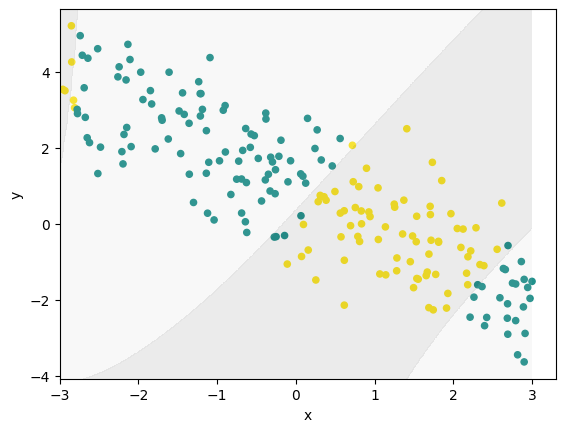

In [21]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LogisticRegression

pipe = Pipeline([
    ("poly", PolynomialFeatures(3)), # degree 1 does nothing
    ("std", StandardScaler()),
    ("lr", LogisticRegression()),
])
pipe.fit(df[["x", "y"]], df["z"])
df.plot.scatter(x="x", y="y", c=df["z"], vmin=-1)
x, y = np.meshgrid(np.arange(-3, 3, 0.01),
                   np.arange(ax.get_ylim()[0], ax.get_ylim()[1], 0.01))
predict_df = pd.DataFrame({
    "x": x.reshape(-1),
    "y": y.reshape(-1),
})
z = pipe.predict(predict_df).reshape(x.shape)
plt.contourf(x, y, z, alpha=0.1, cmap="binary")

In [26]:
def v_v_dot_product(v1, v2):
    assert len(v1) == len(v2)
    total = 0
    for i in range(len(v1)):
        total += v1[i] * v2[i]
    return total

a = np.array([100,10,1])
b = np.array([3,2,0])
v_v_dot_product(a, b) # should be 320

np.int64(320)

In [27]:
def m_v_multiplication(m, v):
    output = []
    for row in m:
        assert len(row) == len(v)
        output.append(v_v_dot_product(row, v))
    return np.array(output)

A = np.array([
    [1,0,3],
    [0,2,3],
])
x = np.array([1,10,100])
m_v_multiplication(A, x) # should be [301, 320]

array([301, 320])

In [28]:
def m_m_multiplication(m1, m2):
    output_cols = []
    for col in m2.T:
        output_cols.append(m_v_multiplication(m1, col))
    return np.array(output_cols).T

A = np.array([
    [1,0],
    [1,2],
    [1,3],
    [0,5],
    [100,200],
])
B = np.array([
    [1,0,10],
    [0,1,1],
])
m_m_multiplication(A, B)

array([[   1,    0,   10],
       [   1,    2,   12],
       [   1,    3,   13],
       [   0,    5,    5],
       [ 100,  200, 1200]])